In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
park_data = pd.read_csv('parkinsons.data')

In [3]:
park_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Attribute Information:

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinsons , (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



In [4]:
park_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
park_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
park_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

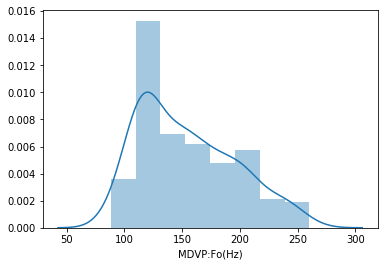

In [7]:
sns.distplot(park_data['MDVP:Fo(Hz)'])

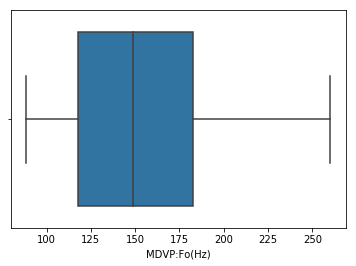

In [8]:
sns.boxplot(park_data['MDVP:Fo(Hz)'])

In [9]:
#observation: Half people have less then ~148 vocal fundamental frequency and visa versa

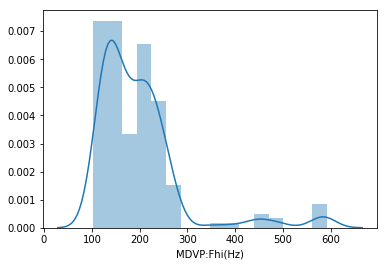

In [10]:
sns.distplot(park_data['MDVP:Fhi(Hz)'])

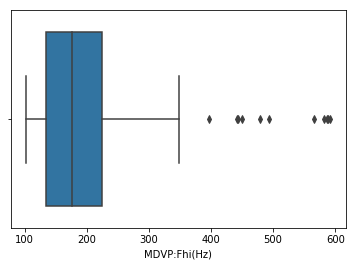

In [11]:
sns.boxplot(park_data['MDVP:Fhi(Hz)'])

In [12]:
#observation: It has a lot of ouliers and hence its mean cannot be trusted

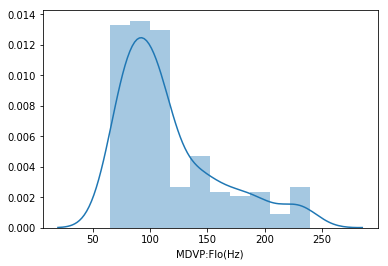

In [13]:
sns.distplot(park_data['MDVP:Flo(Hz)'])

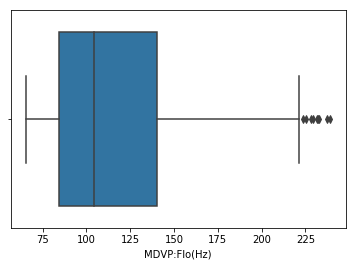

In [14]:
sns.boxplot(park_data['MDVP:Flo(Hz)'])

In [15]:
#observation It is skewed right and has a long tail since it has outliers and hence its average/mean cannot be trusted

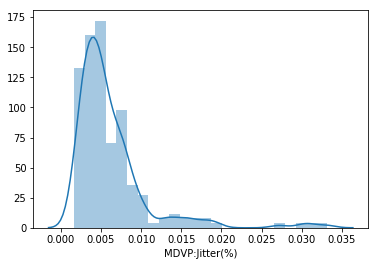

In [16]:
sns.distplot(park_data['MDVP:Jitter(%)'])

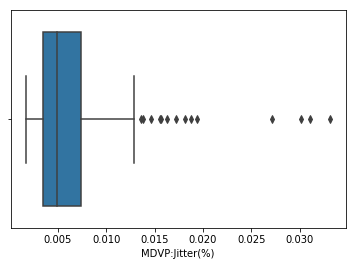

In [17]:
sns.boxplot(park_data['MDVP:Jitter(%)'])

In [18]:
#observation - It is right skewed and has many outliers

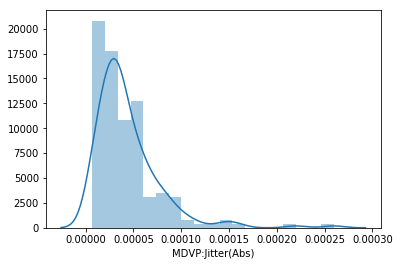

In [19]:
sns.distplot(park_data['MDVP:Jitter(Abs)'])

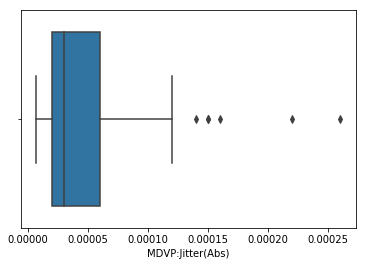

In [20]:
sns.boxplot(park_data['MDVP:Jitter(Abs)'])

In [21]:
#observation - It has many outliers and is right skewed

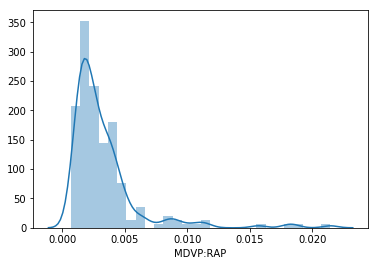

In [22]:
sns.distplot(park_data['MDVP:RAP'])

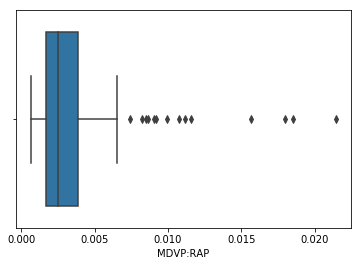

In [23]:
sns.boxplot(park_data['MDVP:RAP'])

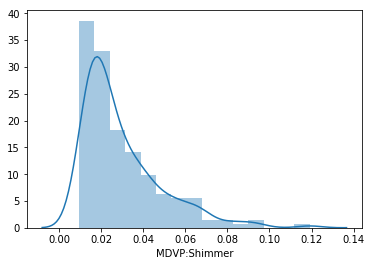

In [24]:
sns.distplot(park_data['MDVP:Shimmer'])

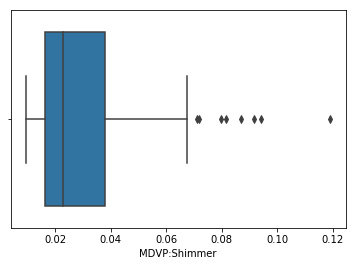

In [25]:
sns.boxplot(park_data['MDVP:Shimmer'])

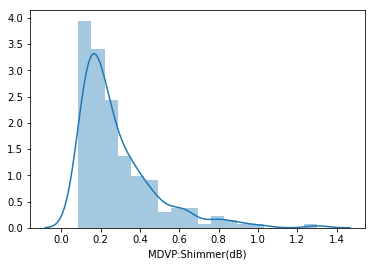

In [26]:
sns.distplot(park_data['MDVP:Shimmer(dB)'])

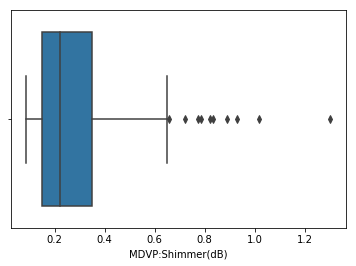

In [27]:
sns.boxplot(park_data['MDVP:Shimmer(dB)'])

In [28]:
#observation - the mdvp-shimmer(db) mostly ranges b/w 0.01-0.04

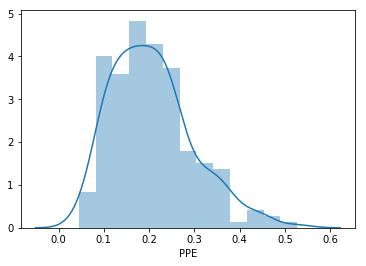

In [29]:
sns.distplot(park_data['PPE'])

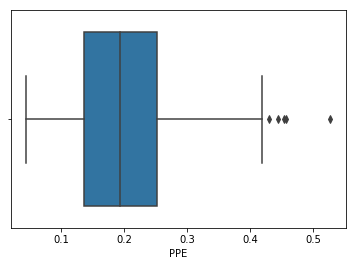

In [30]:
sns.boxplot(park_data['PPE'])

In [31]:
corr_park = park_data.corr()

In [32]:
corr_park.T

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


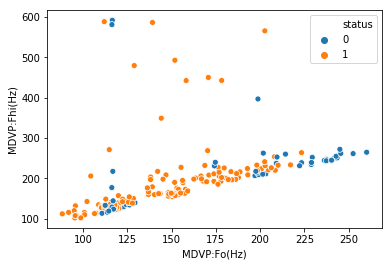

In [33]:
sns.scatterplot(x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status',data=park_data)

In [34]:
 #observation: When MDVP:FO(hz) is above 230 and MDVP - Fhi(hz) is around 215 people don't have parkinson

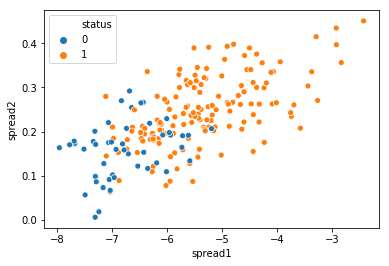

In [35]:
sns.scatterplot(x='spread1',y='spread2',hue='status',data=park_data)

In [36]:
#observation- With increase in Spread1 & Spread2 people suffering from parkinsons disease are increasing

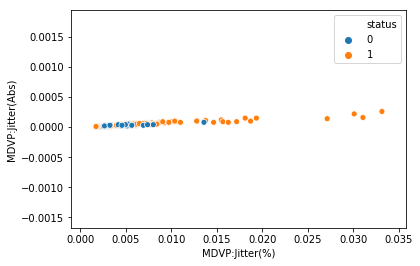

In [37]:
sns.scatterplot(x='MDVP:Jitter(%)',y='MDVP:Jitter(Abs)',hue='status',data=park_data)

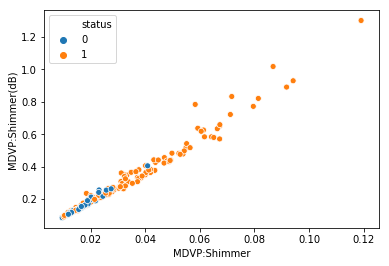

In [38]:
sns.scatterplot(x='MDVP:Shimmer',y='MDVP:Shimmer(dB)',hue='status',data=park_data)

In [39]:
#observation - # people suffering from Parkinsons diseases also increases.

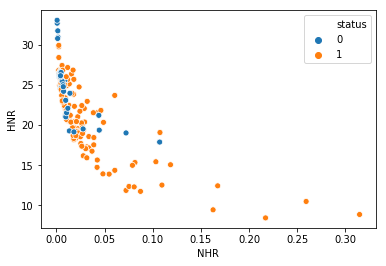

In [40]:
sns.scatterplot(x='NHR',y='HNR',hue='status',data=park_data)

In [41]:
#observation - it has negative correation and # of people having parkinson diseases increases

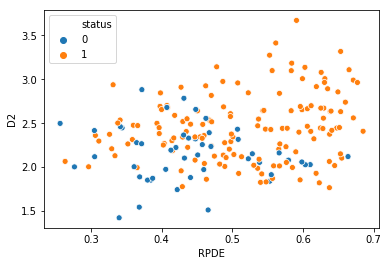

In [42]:
sns.scatterplot(x='RPDE',y='D2',hue='status',data=park_data)

In [43]:
#observation - With increase in RPDE and D2 people are healthy

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
y = park_data['status']
x= park_data.drop(['status','name'],axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy' )
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
model.score(x_test , y_test) 

0.8983050847457628

In [50]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn import metrics

In [52]:
print(metrics.confusion_matrix(y_test, y_predict))

[[13  3]
 [ 3 40]]


In [53]:
model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 8, min_samples_leaf=8)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
model.score(x_test , y_test)

0.864406779661017

# After implying the regularization parameters it improves the the model accuracy by approx 7% which is a huge impact on the model.

In broader sense, Regularization (as any means to prevent overfit) for Trees. As Out of all machine learning techniques, decision trees are amongst the most prone to overfitting.

In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training data set.... In short, a decision tree is overfitted if it gives highly accurate output on training data, but low accurate output on test data.

In [55]:
y_predict = model.predict(x_test)

In [56]:
y_predict

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
print(metrics.confusion_matrix(y_test, y_predict))

[[14  2]
 [ 6 37]]


In [58]:
# Improve the model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(x_train, y_train)

In [60]:
model.score(x_test , y_test) 

0.864406779661017

In [61]:
y_predict = rfcl.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[14  2]
 [ 1 42]]


In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_value = roc_auc_score(y_test, y_predict)
roc_value

0.9258720930232558